# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [2]:
import pandas as pd

In [3]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [4]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [5]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [30]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [7]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차평균승객수_x,하차평균승객수_x,승차평균승객수_y,하차평균승객수_y
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [33]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [34]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,30.091976,28.042885,25054790,2.334870e+07
1,11020,29.687268,28.109760,25420020,2.406926e+07
2,11030,29.444789,22.933249,22930100,1.785924e+07
3,11040,29.728028,26.925719,22638220,2.050423e+07
4,11050,30.242313,28.473755,22875800,2.153803e+07


In [35]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [36]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [37]:
df.head(25)

,도착 시군구 코드,자치구,정류장수,노선수,승차평균승객수_x,하차평균승객수_x,승차평균승객수_y,하차평균승객수_y,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,30.091976,28.042885,25054790,2.334870e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,29.687268,28.109760,25420020,2.406926e+07
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,29.444789,22.933249,22930100,1.785924e+07
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,29.728028,26.925719,22638220,2.050423e+07
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,30.242313,28.473755,22875800,2.153803e+07
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,29.124820,25.905398,21707660,1.930812e+07
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,29.545515,27.048953,18798570,1.721011e+07
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,29.773638,29.381946,21792070,2.150538e+07
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,30.625399,25.976199,16995810,1.441570e+07
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,30.129880,25.321925,15559100,1.307627e+07


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : 노선수가 적을수록 이동시간이 길어져서 사람들이 불편을 겪을것이다.

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [13]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [19]:
import scipy.stats as spst

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


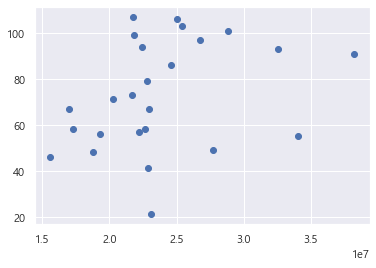

In [22]:
plt.scatter(df['총 이동 시간'], df['노선수'])
plt.show()

In [26]:
# target = 

In [21]:
spst.pearsonr(df['총 이동 시간'], df['노선수'])

(0.3267581424451597, 0.11087670095197157)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='노선수', ylabel='총 이동 시간'>

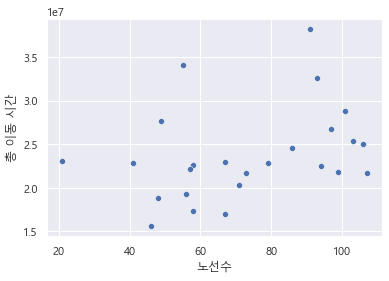

In [25]:
sns.scatterplot(df['노선수'], df['총 이동 시간'])

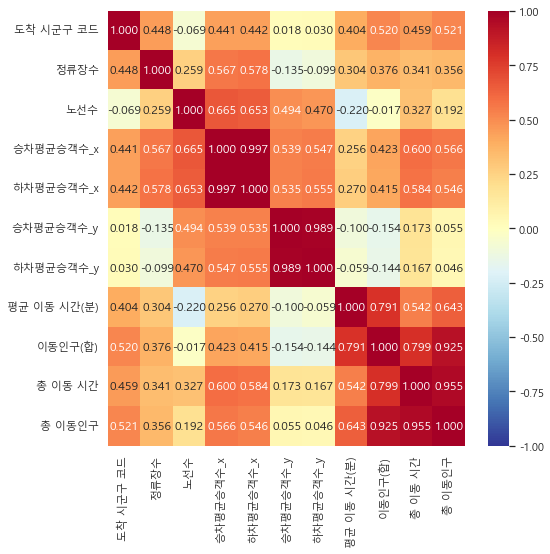

In [23]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()

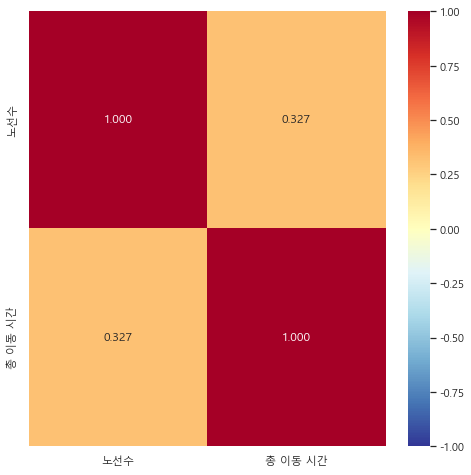

In [43]:
plt.figure(figsize = (8, 8))
sns.heatmap(df[['노선수','총 이동 시간']].corr(), annot = True, fmt = '.3f', cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()

### 1)

### 2)

### 3)

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?